# **Import Necessary Packages**

In [20]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings to keep the output clean
warnings.filterwarnings('ignore')

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")


# **Loading the Dataset**

In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
df_test= pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')

# Show the first 5 rows of the dataset to get a sense of the data
df_test.head()


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [4]:
# Check the shape of the dataset
print(f"Dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns.")

Dataset has 39098 rows and 12 columns.


# Summary of Features (Data Types and Non-null Counts)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [6]:
#Descriptive Statistics for Numerical Features
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [7]:
# Identify categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


# Check for missing values


In [8]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

# so we don't have any missing values



Series([], dtype: int64)

# Target Variable Distribution (loan_status)

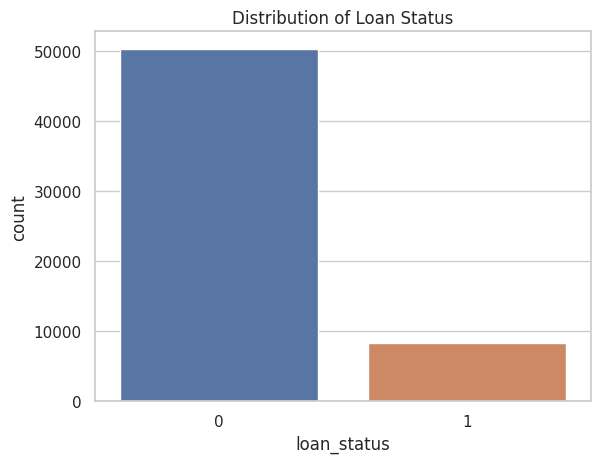

In [9]:
# Visualize the distribution of the target variable 'loan_status'
sns.countplot(x='loan_status', data=df)
plt.title("Distribution of Loan Status")
plt.show()


The plot shows a highly imbalanced dataset for the target variable loan_status:

**Class 0 (non-defaults): has significantly more samples compared to Class 1 (defaults).** The imbalance between the classes is noticeable, with Class 0 dominating the dataset. 

# Univariate Analysis (Understanding Individual Features)

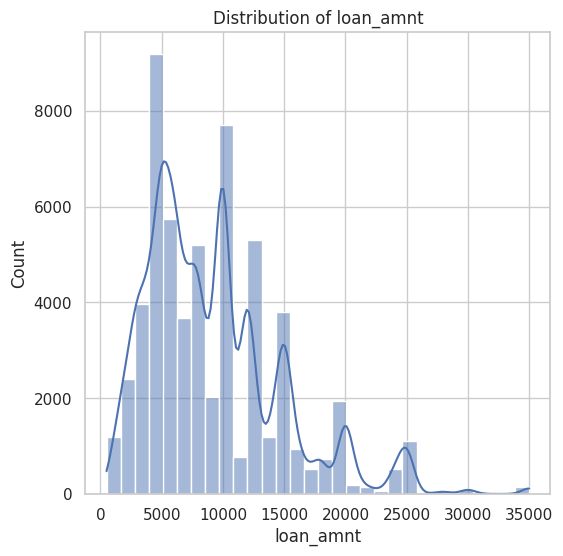

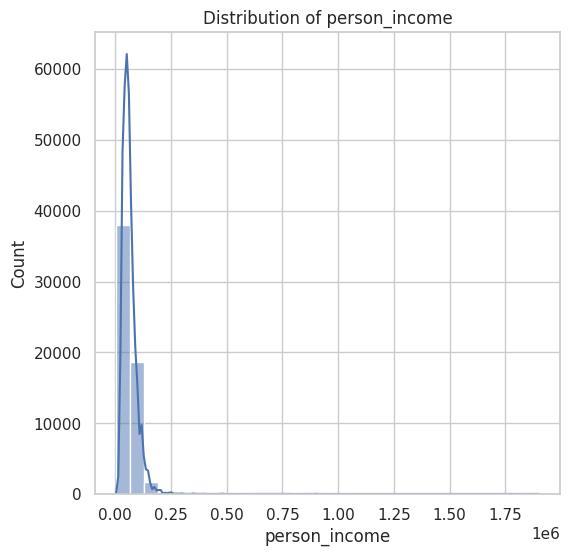

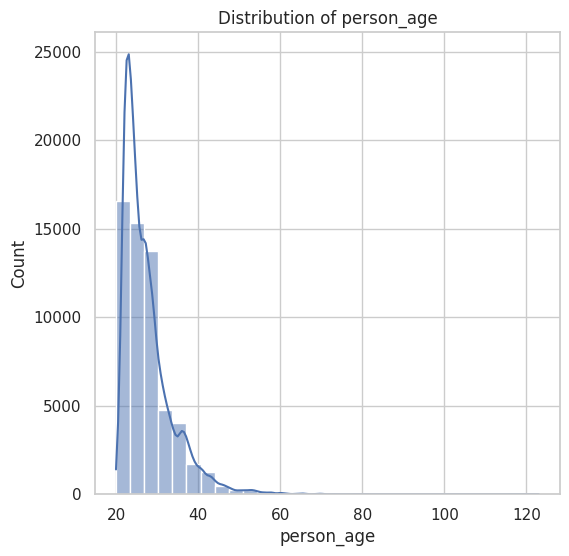

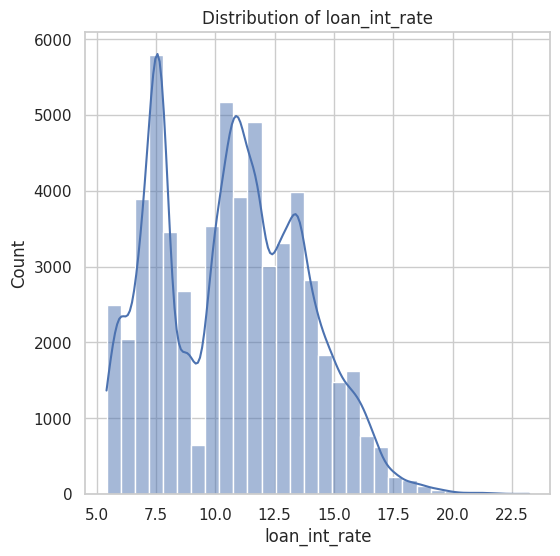

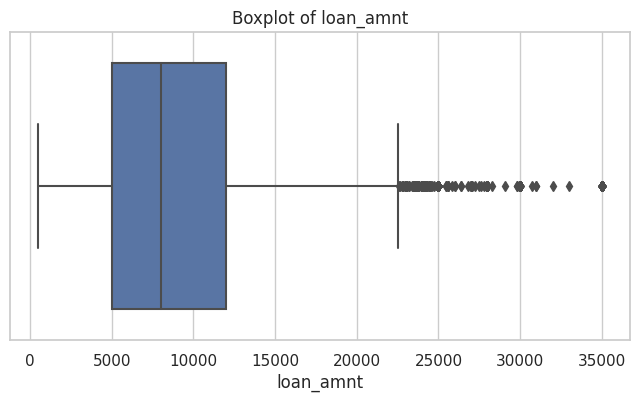

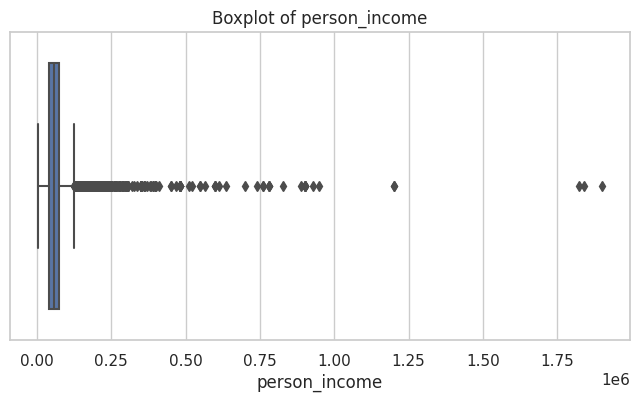

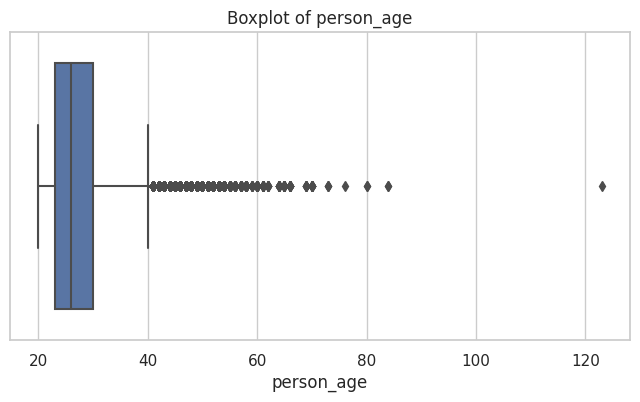

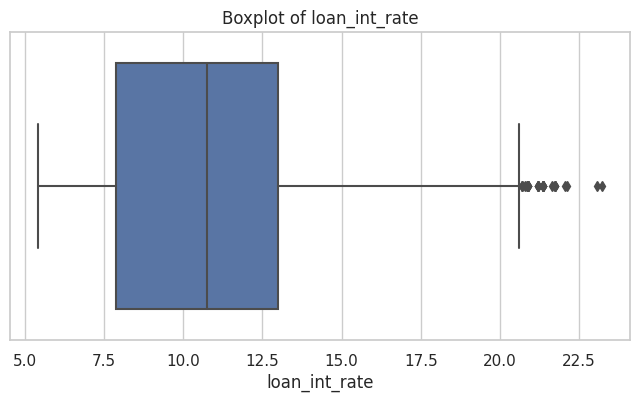

In [10]:
# List of numerical columns to analyze
numerical_cols = ['loan_amnt', 'person_income', 'person_age', 'loan_int_rate']

# Plot histograms for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(6, 6))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Plot boxplots to check for outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


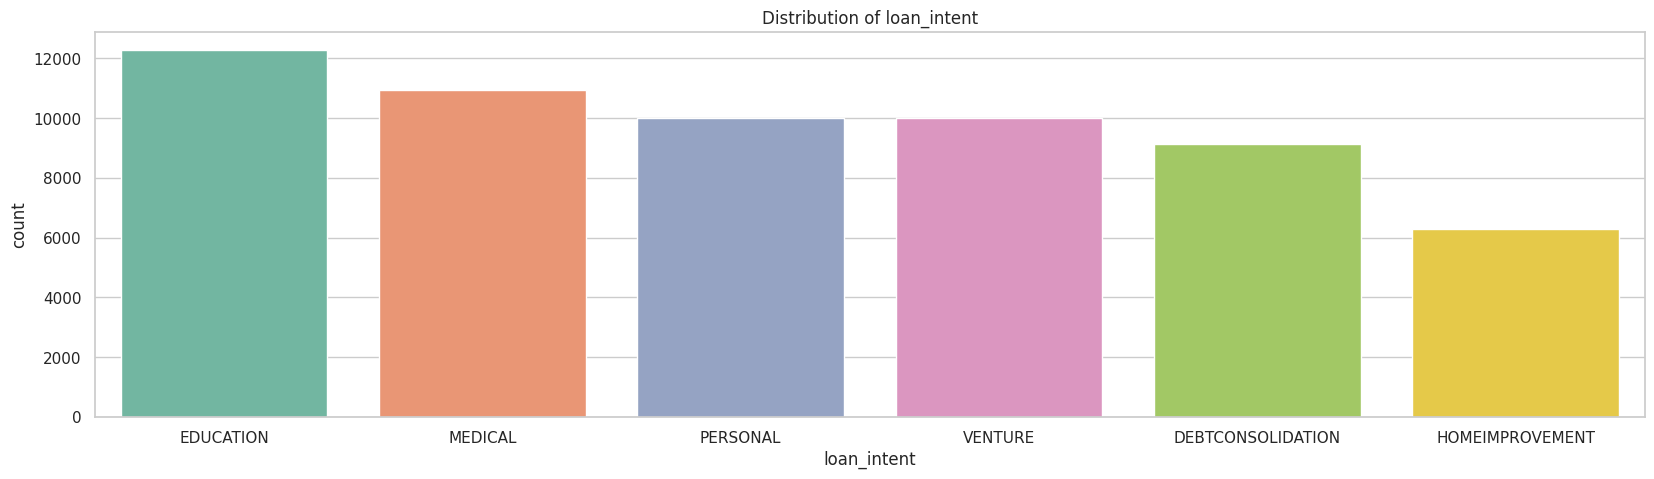

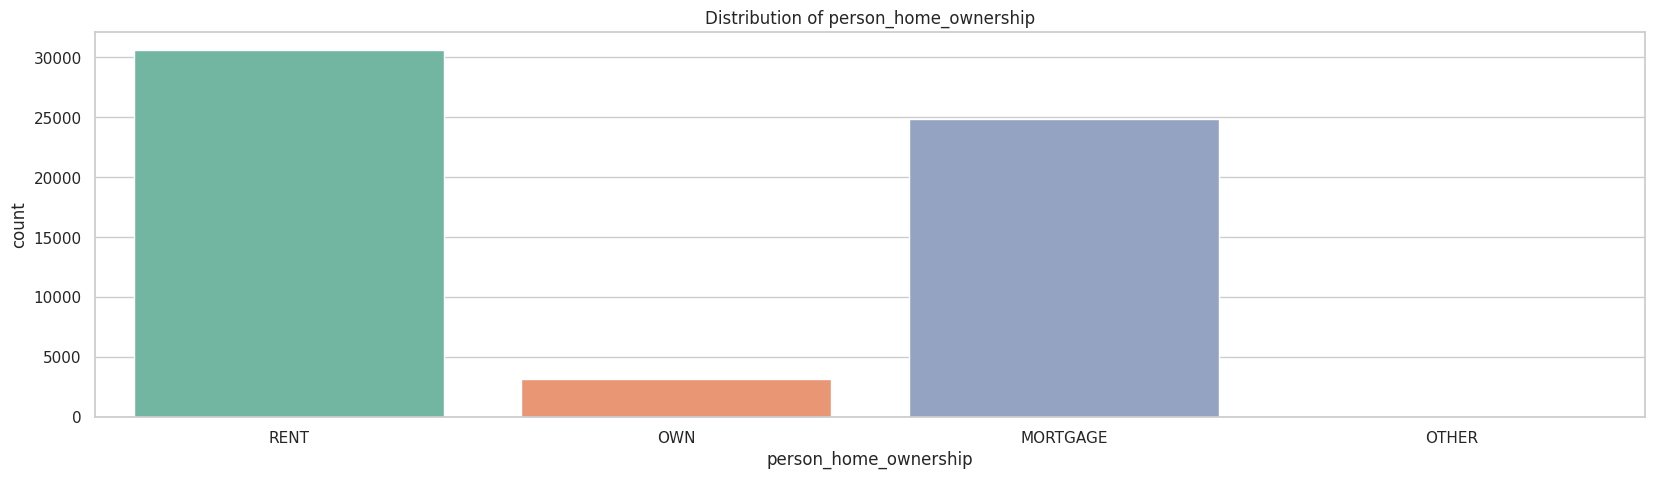

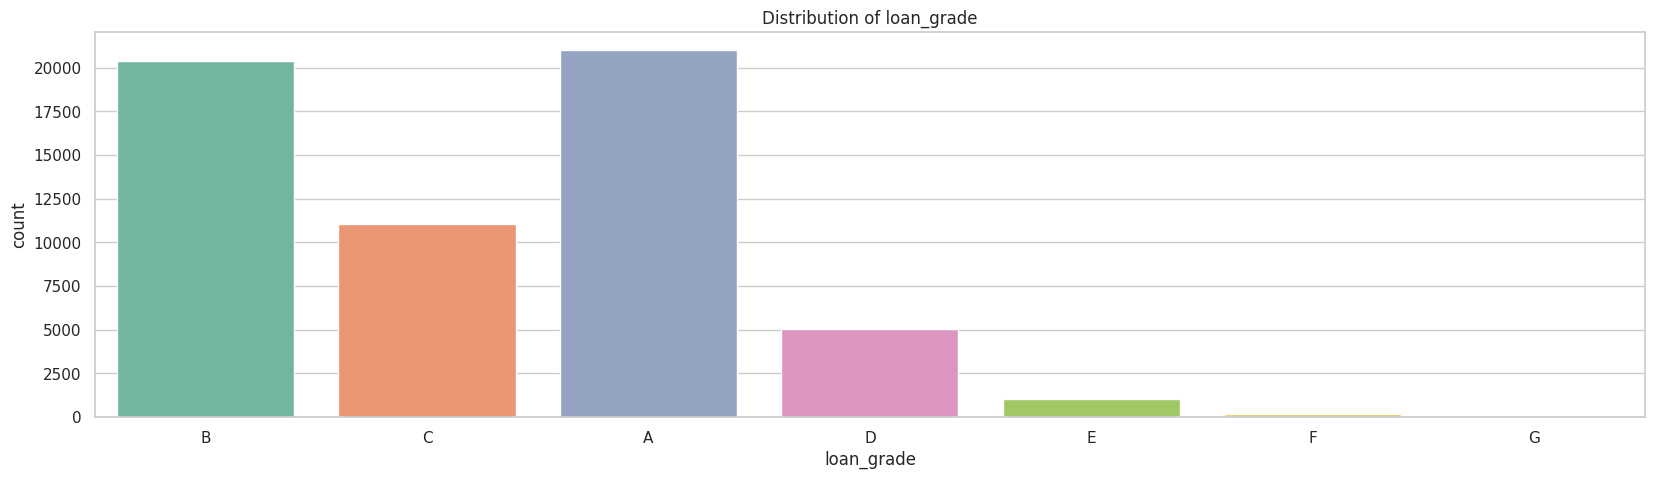

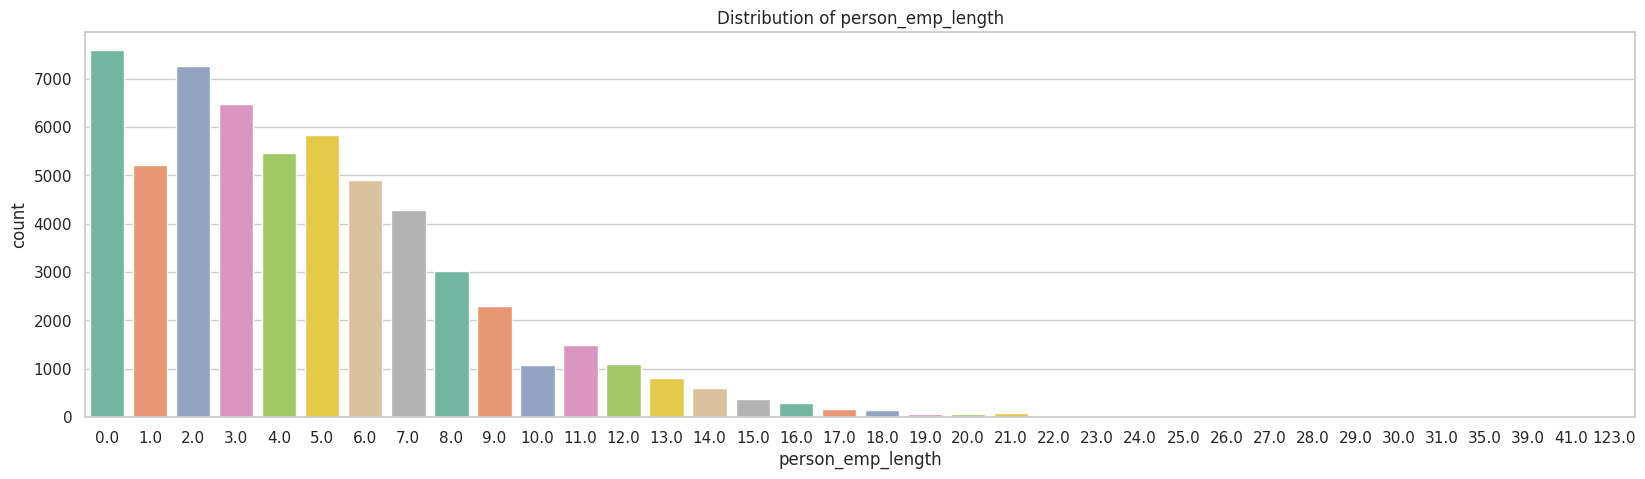

In [11]:
# List of categorical columns
categorical_cols = ['loan_intent', 'person_home_ownership', 'loan_grade', 'person_emp_length']

# Plot bar charts for categorical features
for col in categorical_cols:
    plt.figure(figsize=(20, 5))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.show()


# Bivariate Analysis (Relationships with Target Variable)

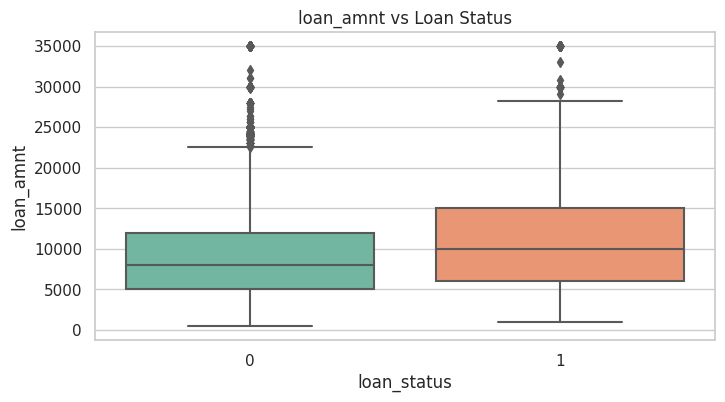

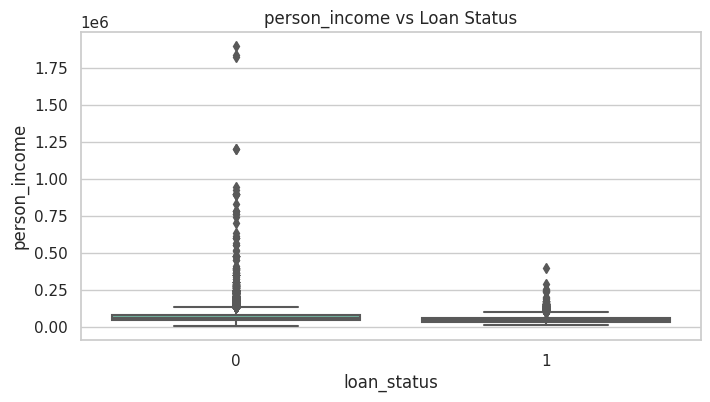

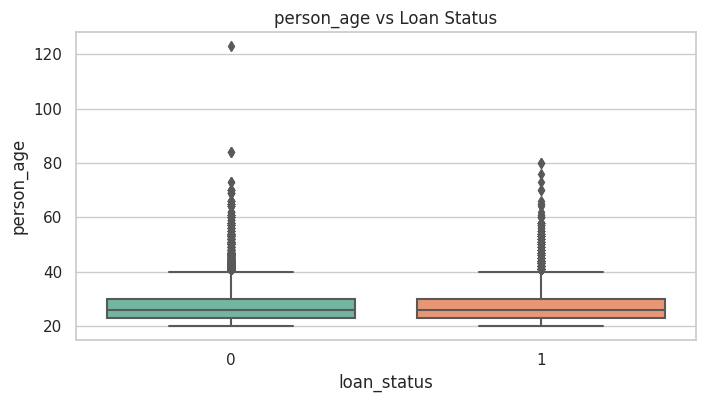

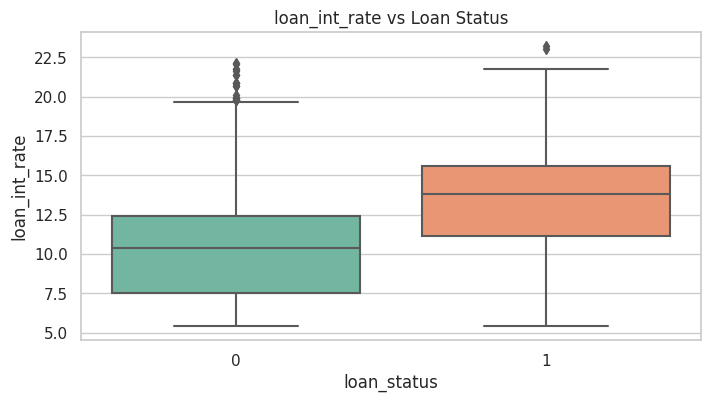

In [12]:
# Box plots to compare numerical features against loan_status
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='loan_status', y=col, data=df, palette='Set2')
    plt.title(f"{col} vs Loan Status")
    plt.show()


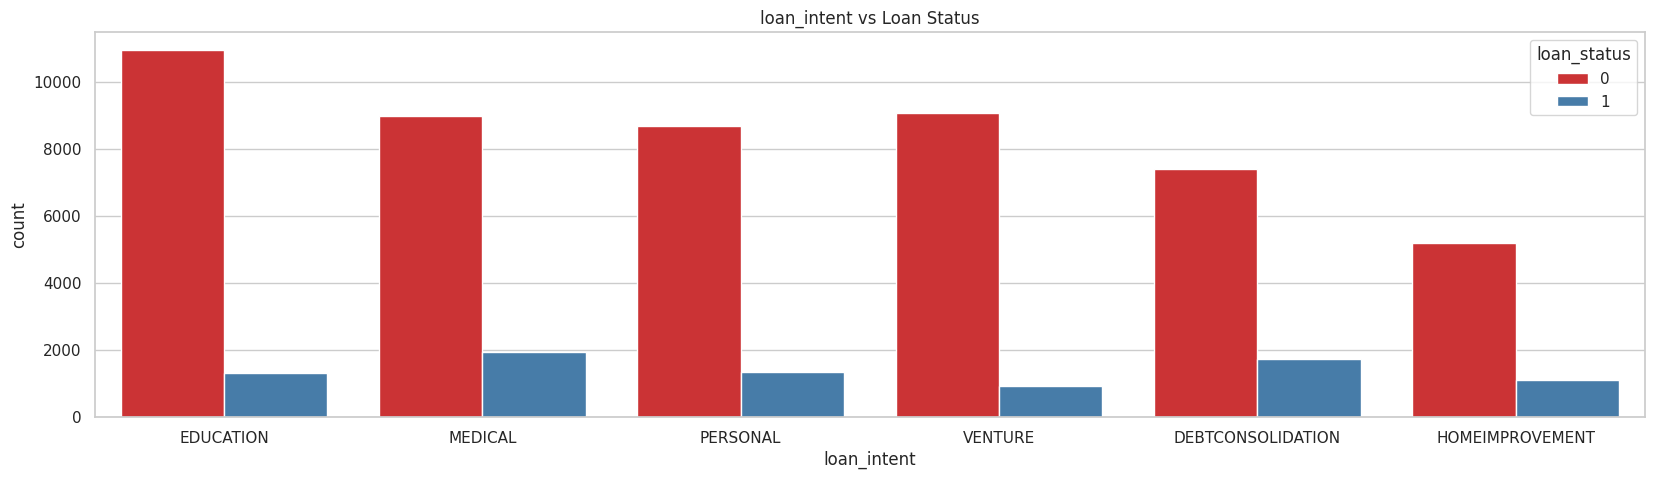

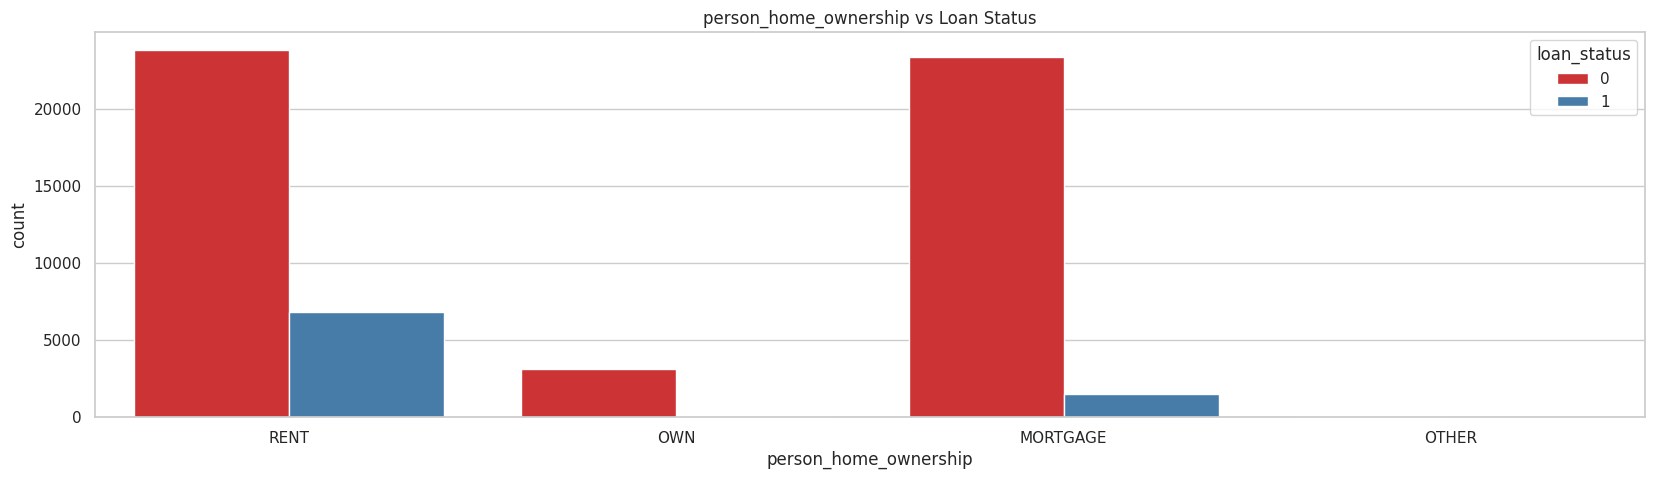

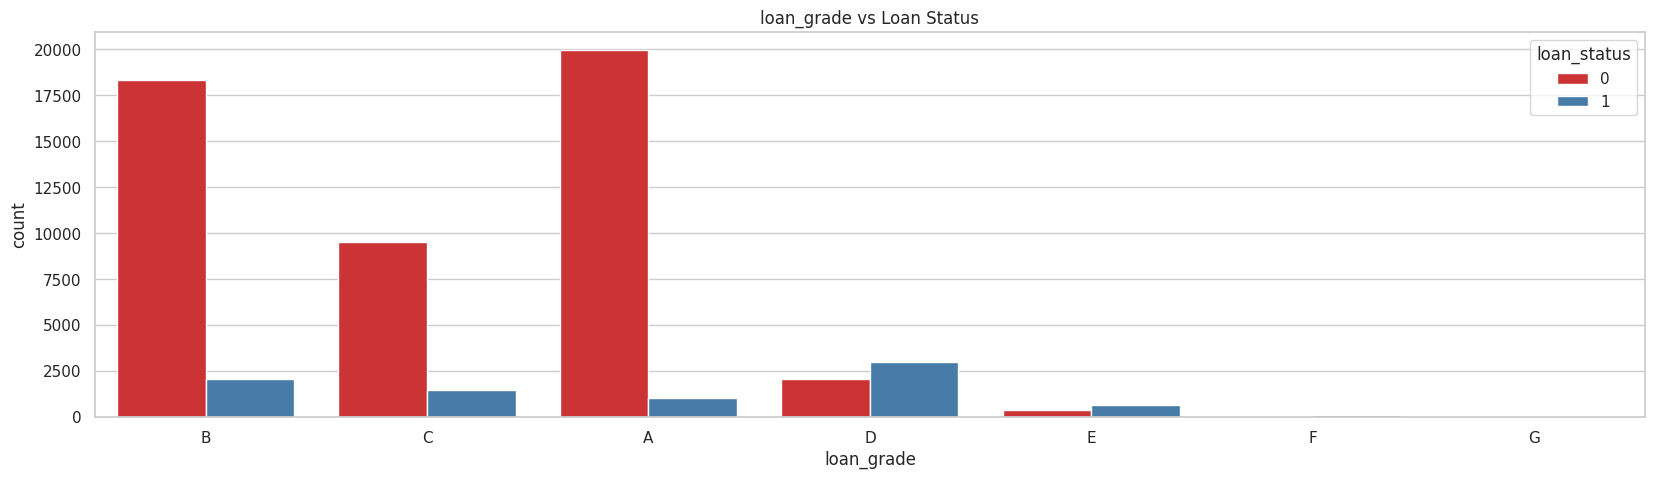

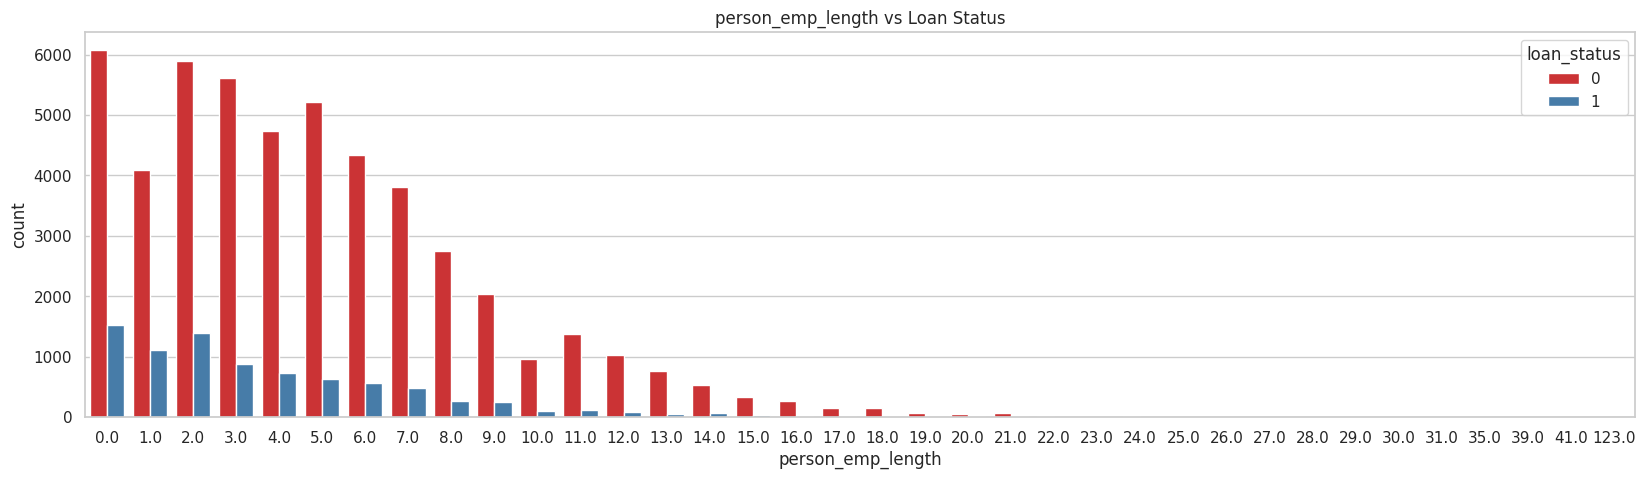

In [13]:
# Categorical features vs loan_status
for col in categorical_cols:
    plt.figure(figsize=(20, 5))
    sns.countplot(x=col, hue='loan_status', data=df, palette='Set1')
    plt.title(f"{col} vs Loan Status")
    plt.show()


# Visualize the Feature Correlation Matrix with a Heatmap

In [14]:
 # One-Hot Encode the Categorical Features
    
   # Perform one-hot encoding on categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head().columns
 

Index(['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'loan_status', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_Y'],
      dtype='object')

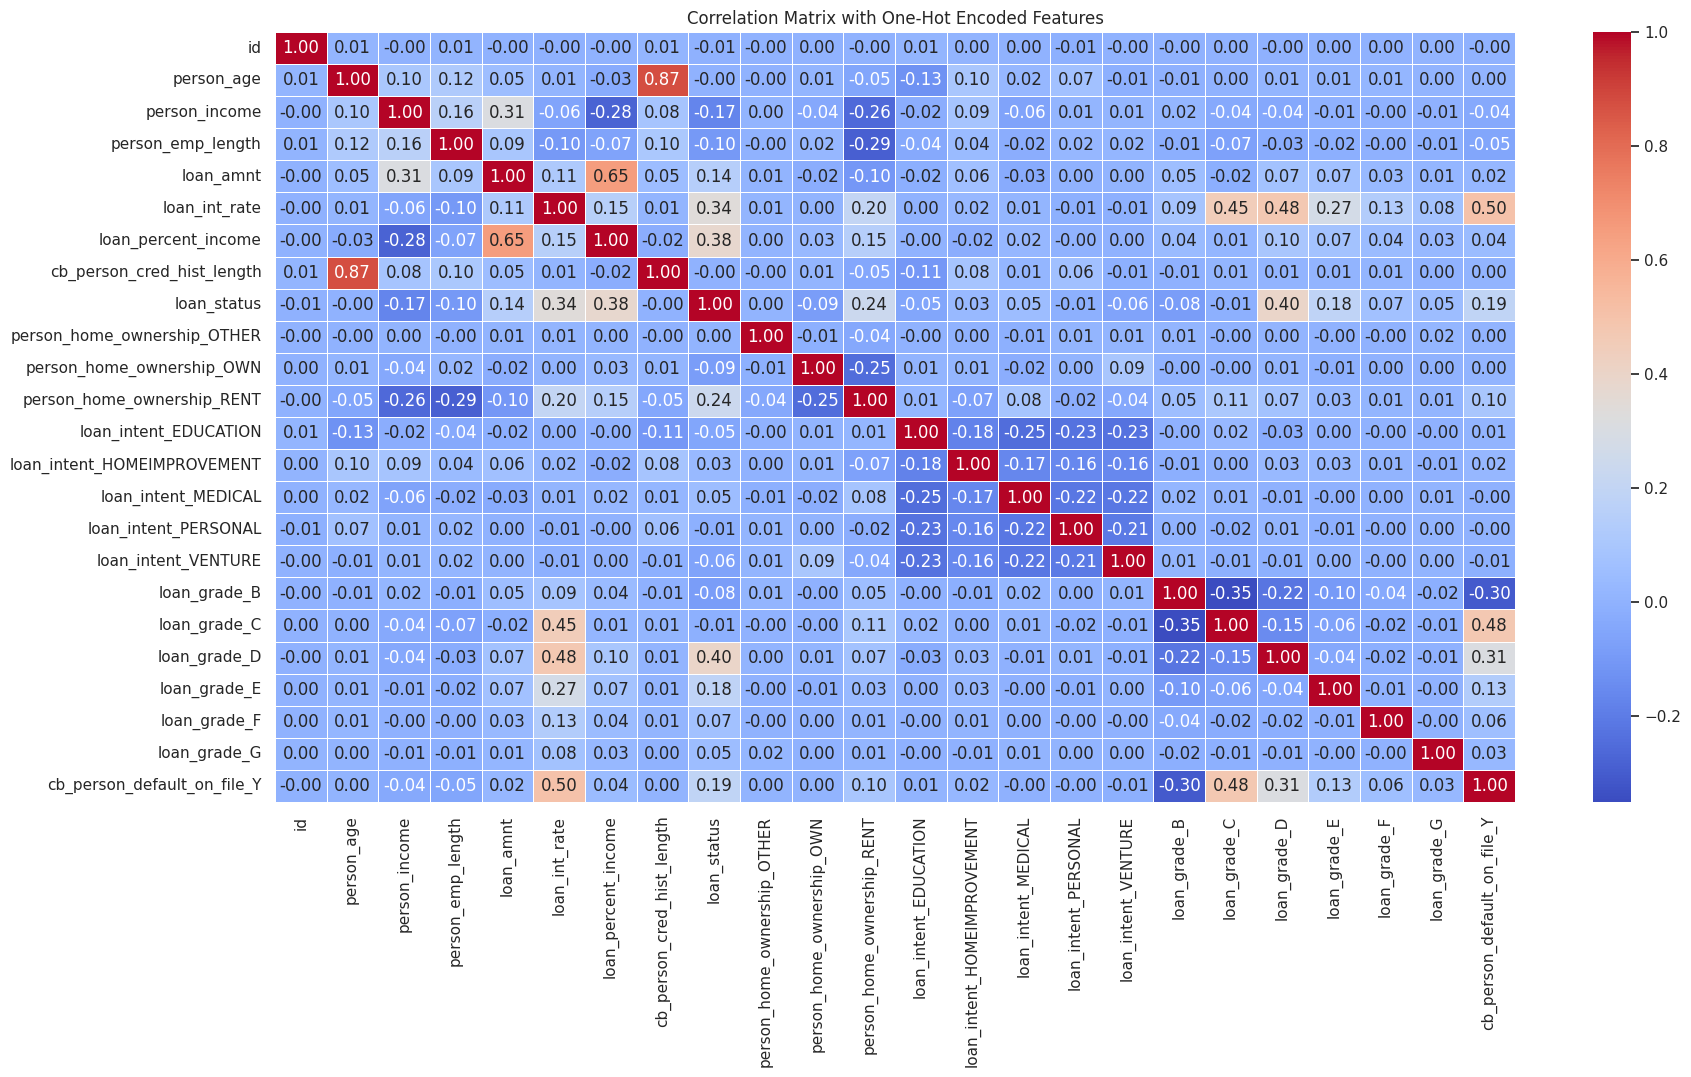

In [15]:
# Calculate correlation matrix for the one-hot encoded dataset
corr_matrix = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix with One-Hot Encoded Features')

# Save the figure
plt.savefig('correlation_matrix_encoded.png')

# Show the plot
plt.show()


### Key Findings from the Correlation Heatmap:

1. **Important Predictors**:
   - **Interest Rate (loan_int_rate)** has a **moderate correlation (0.34)** with loan status, indicating it is a strong predictor.
   - **Loan Percent Income (loan_percent_income)** shows a significant correlation **(0.38)** with loan status, highlighting the importance of income-to-loan ratio in determining loan outcomes.

2. **Multicollinearity**:
   - **`person_age`** and **`cb_person_cred_hist_length`** are highly correlated **(0.87)**, suggesting multicollinearity. One of them should likely be dropped to prevent redundancy in the model.

3. **Loan Grades and Interest Rate**:
   - Loan grades **C, D, and E** are positively correlated with interest rates **(0.45-0.50)**, reflecting that higher loan grades are associated with higher interest rates, likely due to increased risk.

4. **Features to Drop**:
   - **`id`** (pure identifier) and **`person_home_ownership_OTHER`** (low correlation with target and other variables) should be dropped as they provide little predictive power.

# Examine the Distribution of Each Feature:

To decide whether to keep **person_age** or **cb_person_cred_hist_length** , let's approach this systematically:


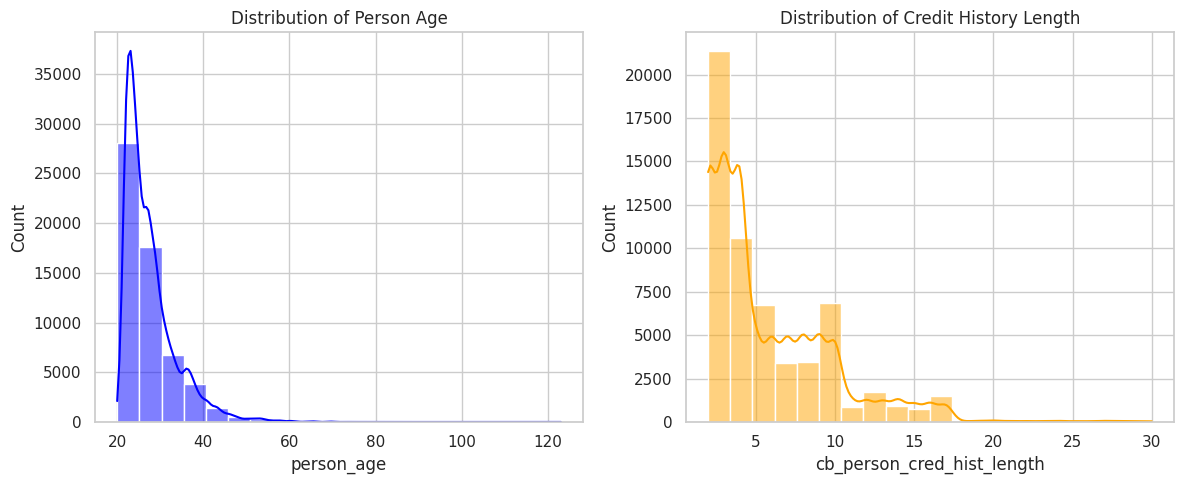

In [16]:
# Plot distributions of person_age and cb_person_cred_hist_length
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['person_age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Person Age')

plt.subplot(1, 2, 2)
sns.histplot(df['cb_person_cred_hist_length'], bins=20, kde=True, color='orange')
plt.title('Distribution of Credit History Length')

plt.tight_layout()
plt.savefig('age_vs_credit_history.png')
plt.show()


                       Feature  Importance
6          loan_percent_income    0.235148
5                loan_int_rate    0.137837
2                person_income    0.100828
18                loan_grade_D    0.072907
10  person_home_ownership_RENT    0.068636
4                    loan_amnt    0.067342
0                           id    0.062224
3            person_emp_length    0.054729
1                   person_age    0.041925
7   cb_person_cred_hist_length    0.033295


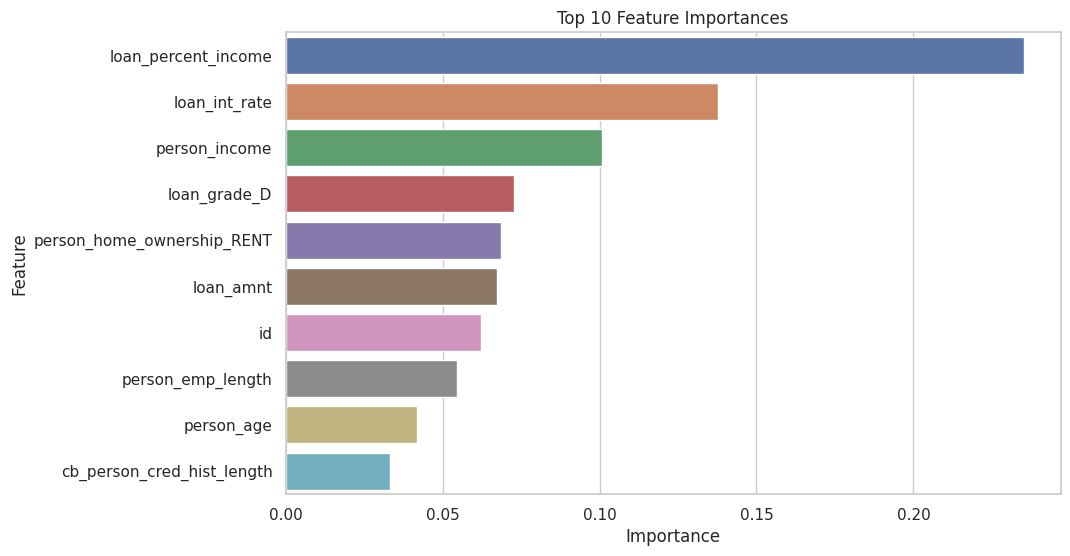

In [17]:
# Run a Baseline Model for Feature Importance:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data
X = df_encoded.drop(columns=['loan_status'])
y = df_encoded['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importances.sort_values(by='Importance', ascending=False, inplace=True)

# Display the top 10 most important features
print(importances.head(10))

# Save the feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances.head(10))
plt.title('Top 10 Feature Importances')
plt.savefig('feature_importances.png')
plt.show()


# Dropping the ID and Low-Importance Features

In [18]:
# Dropping 'id' and other low-importance features
drop_columns = ['id', 'person_age', 'cb_person_cred_hist_length']

# Dropping the columns from the dataframe
df_cleaned = df.drop(columns=drop_columns)
df_cleaned_test=df_test.drop(columns=drop_columns)

# Checking the cleaned dataframe
df_cleaned_test.head()


,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file
0,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N
1,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y
2,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y
3,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N
4,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y


# Keep Important Features and Drop Low-Importance Features

In [23]:
# List of features to keep based on importance
features_to_keep = [
    'loan_percent_income', 'loan_int_rate', 'person_income', 
    'person_home_ownership', 'loan_amnt', 'person_emp_length', 'loan_status'
]

# Select only the important features from the dataset
df_e = df[features_to_keep]



 # One-Hot Encode the Categorical Features
    
   # Perform one-hot encoding on categorical variables
df_final = pd.get_dummies(df_e, drop_first=True)
df_test_final=pd.get_dummies(df_cleaned_test, drop_first=True)

# Display the first few rows of the encoded dataset

df_test_final.head().columns
# df_final.head().columns

Index(['person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_Y'],
      dtype='object')

# Model Training

In [ ]:
from sklearn.model_selection import train_test_split

#'loan_status' is the target variable
X = df_final.drop('loan_status', axis=1)
y = df_final['loan_status']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Apply scaling
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test_scaled)


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Step 1: Load Data
train = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')

# Step 2: Separate Features and Target in Train Data
X = train.drop(columns=['loan_status', 'id'])  # Drop 'loan_status' and 'id' from train set
y = train['loan_status']  # Target variable

# Step 3: Preprocess the Data
# Define numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine into a Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])

# Step 4: Split Train and Validation Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build the Model Pipeline with Preprocessor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Step 6: Train the Model
model.fit(X_train, y_train)

# Step 7: Validate Model with ROC-AUC Score
y_val_probs = model.predict_proba(X_val)[:, 1]  # Probability for positive class (loan_status = 1)
roc_auc = roc_auc_score(y_val, y_val_probs)
print(f"Validation ROC-AUC Score: {roc_auc:.4f}")

# Step 8: Prepare Test Data and Generate Predictions
X_test = test.drop(columns=['id'])  # Drop 'id' in test set
test_probs = model.predict_proba(X_test)[:, 1]  # Probability for positive class

# Step 9: Create Submission File
submission = pd.DataFrame({
    'id': test['id'],
    'loan_status': test_probs
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("Submission file created as 'submission.csv'.")


Validation ROC-AUC Score: 0.9547
Submission file created as 'submission.csv'.


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

# Define models to try
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}

# Preprocessing (same as before)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Create a pipeline for each model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict probabilities for validation set
    y_val_probs = pipeline.predict_proba(X_val)[:, 1]  # Probability for positive class
    
    # Calculate ROC-AUC
    roc_auc = roc_auc_score(y_val, y_val_probs)
    results[model_name] = roc_auc
    
    print(f"{model_name} ROC-AUC Score: {roc_auc:.4f}")

# Display results sorted by ROC-AUC
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\nModel Performance Summary:")
for model_name, roc_auc in sorted_results:
    print(f"{model_name}: {roc_auc:.4f}")


Logistic Regression ROC-AUC Score: 0.9049
Random Forest ROC-AUC Score: 0.9372
Gradient Boosting ROC-AUC Score: 0.9431
XGBoost ROC-AUC Score: 0.9547
[LightGBM] [Info] Number of positive: 6708, number of negative: 40208
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142979 -> initscore=-1.790765
[LightGBM] [Info] Start training from score -1.790765
LightGBM ROC-AUC Score: 0.9588
CatBoost ROC-AUC Score: 0.9581

Model Performance Summary:
LightGBM: 0.9588
CatBoost: 0.9581
XGBoost: 0.9547
Gradient Boosting: 0.9431
Random Forest: 0.9372
Logistic Regression: 0.9049


In [25]:
# Try optuna for futher use
import optuna
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# Define the objective function
def objective(trial):
    # Define hyperparameter search space
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'random_state': 42
    }
    
    # Create pipeline
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(**param, use_label_encoder=False, eval_metric='logloss'))
    ])
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predict probabilities on validation set
    y_val_probs = model.predict_proba(X_val)[:, 1]
    
    # Calculate and return ROC-AUC score
    roc_auc = roc_auc_score(y_val, y_val_probs)
    return roc_auc


In [27]:
# Create study and optimize
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)  # You can increase n_trials for a more extensive search

# Get best parameters
print("Best ROC-AUC score:", study.best_value)
print("Best parameters:", study.best_params)


[I 2024-10-25 18:52:11,505] A new study created in memory with name: no-name-5c4e2905-4f97-4c4e-b8e1-9480ea1aee9e
[I 2024-10-25 18:52:12,363] Trial 0 finished with value: 0.9557802658889586 and parameters: {'n_estimators': 335, 'max_depth': 5, 'learning_rate': 0.1532288445237433, 'subsample': 0.8794605624712117, 'colsample_bytree': 0.7683873419828791, 'gamma': 3.5091223606043416}. Best is trial 0 with value: 0.9557802658889586.
[I 2024-10-25 18:52:13,886] Trial 1 finished with value: 0.9503553252356147 and parameters: {'n_estimators': 257, 'max_depth': 11, 'learning_rate': 0.01227930107227566, 'subsample': 0.5333952687750336, 'colsample_bytree': 0.8390533323112863, 'gamma': 4.231523272247872}. Best is trial 0 with value: 0.9557802658889586.
[I 2024-10-25 18:52:14,923] Trial 2 finished with value: 0.9568984910450818 and parameters: {'n_estimators': 216, 'max_depth': 10, 'learning_rate': 0.04596653675828174, 'subsample': 0.7501503916104918, 'colsample_bytree': 0.823275496158851, 'gamma':

Best ROC-AUC score: 0.9589087726064602
Best parameters: {'n_estimators': 500, 'max_depth': 12, 'learning_rate': 0.02723891492692942, 'subsample': 0.8413668479763186, 'colsample_bytree': 0.5757965966878327, 'gamma': 2.3425745341339588}


In [28]:
# Train the model with the best parameters
best_params = study.best_params
best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42))
])

best_model.fit(X_train, y_train)

# Evaluate on validation set
y_val_probs = best_model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_probs)
print(f"Optimized ROC-AUC Score on Validation Set: {roc_auc:.4f}")


Optimized ROC-AUC Score on Validation Set: 0.9589


In [29]:
# Predict probabilities for the test set (for loan_status = 1)
y_test_probs = best_model.predict_proba(X_test)[:, 1]

# Create submission dataframe
submission = pd.DataFrame({'id': test['id'], 'loan_status': y_test_probs})
submission.to_csv('submission.csv', index=False)
